In [20]:
import pandas as pd

# Quick EDA

In [21]:
TRAIN_SET_PATH = "data/train.csv"
TEST_SET_PATH = "data/test.csv"

In [22]:
train_df = pd.read_csv(TRAIN_SET_PATH)
test_df = pd.read_csv(TEST_SET_PATH)

In [23]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train_df.isnull().sum().sum()

np.int64(0)

In [42]:
import matplotlib.pyplot as plt


def display_sample_images(data, labels, samples):
    plt.figure(figsize=(10, 2))
    for i in range(samples):
        image = data.iloc[i].values.reshape(28, 28)
        label = labels.iloc[i]
        plt.subplot(1, samples, i + 1)
        plt.imshow(image, cmap="gray")
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.show()

In [43]:
X = train_df.drop("label", axis=1)
y = train_df["label"]

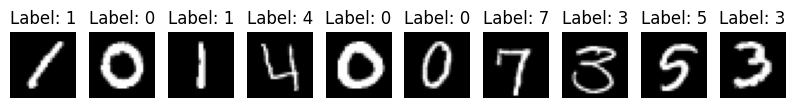

In [44]:
display_sample_images(X, y, samples=10)

In [28]:
label_counts = y.value_counts()

label_counts

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

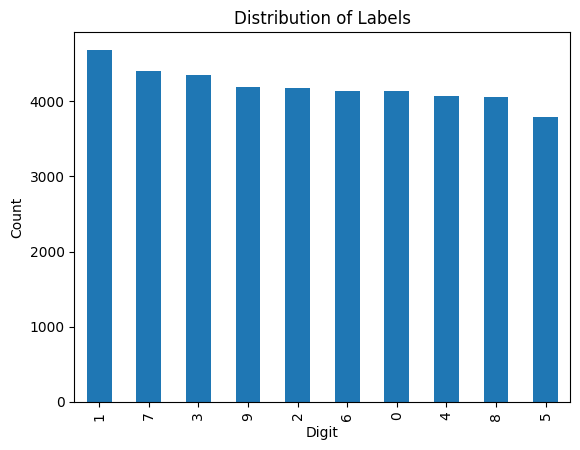

In [29]:
label_counts.plot(kind="bar")
plt.title("Distribution of Labels")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [30]:
X = X / 255.0
test_data = test_df / 255.0

In [31]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
test_pca = pca.transform(test_data)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_pca.shape}")

Original shape: (42000, 784)
Reduced shape: (42000, 154)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Training amd evaluating models

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9776


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_val)
knn_accuracy = accuracy_score(y_val, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.9669


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9405


In [48]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
lr_accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 0.9185


SVM works best so far. Let's try to tune the hyperparameters

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 1, 10], "gamma": ["scale", "auto"], "kernel": ["rbf", "poly"]}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_

y_pred_best_svm = best_svm.predict(X_val)
best_svm_accuracy = accuracy_score(y_val, y_pred_best_svm)
print(f"Best SVM Accuracy: {best_svm_accuracy:.4f}")

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 0.9820


In [50]:
final_model = best_svm
final_model.fit(X_pca, y)

SVC(C=10)

In [51]:
test_predictions = final_model.predict(test_pca)

In [52]:
import numpy as np


submission = pd.DataFrame(
    {"ImageId": np.arange(1, len(test_predictions) + 1), "Label": test_predictions}
)
submission.to_csv("submission.csv", index=False)

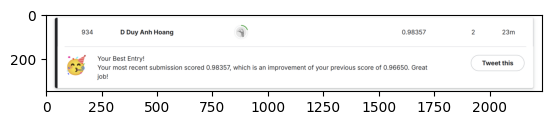

In [57]:
from PIL import Image

sub_img = np.asarray(Image.open("submission.png"))
plt.imshow(sub_img)

Result: 0.98357 on the second submission